### Importing required libraries

In [2]:
from bs4 import BeautifulSoup as soup
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Creating a DataFrame

In [3]:
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M', header=0)

In [4]:
df = tables[0]
df

,Postal code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront
...,...,...,...
175,M5Z,Not assigned,NaN
176,M6Z,Not assigned,NaN
177,M7Z,Not assigned,NaN
178,M8Z,Etobicoke,Mimico NW / The Queensway West / South of Bloo...


In [5]:
df.dropna(inplace = True)

In [6]:
df.reset_index(drop = True, inplace = True)

In [7]:
df.columns  = ['PostalCode','Borough', 'Neighborhood']

In [8]:
df

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park / Harbourfront
3,M6A,North York,Lawrence Manor / Lawrence Heights
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government
...,...,...,...
98,M8X,Etobicoke,The Kingsway / Montgomery Road / Old Mill North
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,Business reply mail Processing CentrE
101,M8Y,Etobicoke,Old Mill South / King's Mill Park / Sunnylea /...


In [9]:
df1 = df['Neighborhood'].apply(lambda x : x.replace('/',','))

In [10]:
type(df1)

pandas.core.series.Series

In [11]:
df1.to_frame()

,Neighborhood
0,Parkwoods
1,Victoria Village
2,"Regent Park , Harbourfront"
3,"Lawrence Manor , Lawrence Heights"
4,"Queen's Park , Ontario Provincial Government"
...,...
98,"The Kingsway , Montgomery Road , Old Mill North"
99,Church and Wellesley
100,Business reply mail Processing CentrE
101,"Old Mill South , King's Mill Park , Sunnylea ,..."


In [12]:
df.drop('Neighborhood',axis =1,inplace = True)

In [13]:
df3 = pd.concat([df,df1], axis = 1)

In [14]:
df3

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park , Harbourfront"
3,M6A,North York,"Lawrence Manor , Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway , Montgomery Road , Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,Business reply mail Processing CentrE
101,M8Y,Etobicoke,"Old Mill South , King's Mill Park , Sunnylea ,..."


In [15]:
df3.shape

(103, 3)

# Getting the coordinates

In [16]:
df4 = pd.read_csv('Geospatial_Coordinates.csv')

In [17]:
df4

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


In [18]:
df5 = df3.sort_values(by = ['PostalCode'])

In [19]:
df5.reset_index(drop = True, inplace = True)

In [20]:
df5

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Malvern , Rouge"
1,M1C,Scarborough,"Rouge Hill , Port Union , Highland Creek"
2,M1E,Scarborough,"Guildwood , Morningside , West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village , St. Phillips , Martin Grov..."
101,M9V,Etobicoke,"South Steeles , Silverstone , Humbergate , Jam..."


In [21]:
df6 = pd.concat([df5,df4],axis = 1)

In [22]:
df6

,PostalCode,Borough,Neighborhood,Postal Code,Latitude,Longitude
0,M1B,Scarborough,"Malvern , Rouge",M1B,43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill , Port Union , Highland Creek",M1C,43.784535,-79.160497
2,M1E,Scarborough,"Guildwood , Morningside , West Hill",M1E,43.763573,-79.188711
3,M1G,Scarborough,Woburn,M1G,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,M1H,43.773136,-79.239476
...,...,...,...,...,...,...
98,M9N,York,Weston,M9N,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,M9P,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village , St. Phillips , Martin Grov...",M9R,43.688905,-79.554724
101,M9V,Etobicoke,"South Steeles , Silverstone , Humbergate , Jam...",M9V,43.739416,-79.588437


In [23]:
df6.drop('Postal Code', axis = 1, inplace = True)

In [24]:
df6

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern , Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill , Port Union , Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood , Morningside , West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village , St. Phillips , Martin Grov...",43.688905,-79.554724
101,M9V,Etobicoke,"South Steeles , Silverstone , Humbergate , Jam...",43.739416,-79.588437


In [25]:
df6.shape

(103, 5)

#### Analysis of the final data frame

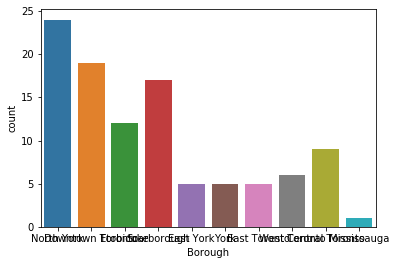

In [26]:
sns.countplot(df["Borough"])

Number of Boroughs and Neighborhoods

In [27]:
print('The dataframe has {} Boroughs and {} Neighborhoods'.format(df6['Borough'].nunique(),df6['Neighborhood'].nunique()))

The dataframe has 10 Boroughs and 98 Neighborhoods


Top 5 most popular Boroughs

In [28]:
df6['Borough'].value_counts().head()

North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           12
Central Toronto      9
Name: Borough, dtype: int64

Postal codes in North York

In [29]:
df6[df6['Borough'] == 'North York']['PostalCode']

17    M2H
18    M2J
19    M2K
20    M2L
21    M2M
22    M2N
23    M2P
24    M2R
25    M3A
26    M3B
27    M3C
28    M3H
29    M3J
30    M3K
31    M3L
32    M3M
33    M3N
34    M4A
62    M5M
71    M6A
72    M6B
79    M6L
96    M9L
97    M9M
Name: PostalCode, dtype: object

Coordinates for Postal codes in North York

In [30]:
df6[df6['Borough'] == 'North York'][['PostalCode','Latitude','Longitude']]

,PostalCode,Latitude,Longitude
17,M2H,43.803762,-79.363452
18,M2J,43.778517,-79.346556
19,M2K,43.786947,-79.385975
20,M2L,43.757490,-79.374714
21,M2M,43.789053,-79.408493
22,M2N,43.770120,-79.408493
23,M2P,43.752758,-79.400049
24,M2R,43.782736,-79.442259
25,M3A,43.753259,-79.329656
26,M3B,43.745906,-79.352188


Top 5 most popular Neighborhoods

In [33]:
df6['Neighborhood'].value_counts().head(3)

Downsview     4
Don Mills     2
Willowdale    2
Name: Neighborhood, dtype: int64

Postal codes in Downsview

In [34]:
df6[df6['Neighborhood'] == 'Downsview']['PostalCode']

30    M3K
31    M3L
32    M3M
33    M3N
Name: PostalCode, dtype: object

Coordinates for Postal codes in Downsview

In [35]:
df6[df6['Neighborhood'] == 'Downsview'][['PostalCode','Latitude','Longitude']]

,PostalCode,Latitude,Longitude
30,M3K,43.737473,-79.464763
31,M3L,43.739015,-79.506944
32,M3M,43.728496,-79.495697
33,M3N,43.761631,-79.520999
